Build a regression model.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [24]:
poi_data = pd.read_csv('poi_data.csv') #read the csv file
poi_data_cleaned = poi_data.dropna(subset=['Rating', 'Review Count']) #drop NaN values
poi_data_cleaned

,POI Name_x,Category_x,Address_x,Latitude,Longitude,POI Name_y,Category_y,Address_y,City,Rating,Review Count
0,NaN,NaN,NaN,49.264745,-123.100690,Como Taperia,Tapas Bars,201 E 7th Avenue,Vancouver,3.7,97.0
1,NaN,NaN,NaN,49.266224,-123.100609,Zarak By Afghan Kitchen,Afghan,2102 Main Street,Vancouver,4.5,123.0
2,NaN,NaN,NaN,49.266709,-123.103814,Blaze Gourmet Burgers,Burgers,43 E 5th Avenue,Vancouver,4.6,36.0
3,NaN,NaN,NaN,49.267041,-123.092655,Nemesis Coffee,Coffee & Tea,555 Great Northern Way,Vancouver,4.2,104.0
4,NaN,NaN,NaN,49.267080,-123.104230,Electric Bicycle Brewing,Breweries,20 E 4th Avenue,Vancouver,4.3,36.0
5,NaN,NaN,NaN,49.267970,-123.101710,Nuba - Mount Pleasant,Mediterranean,146 E 3rd Avenue,Vancouver,3.8,170.0
6,NaN,NaN,NaN,49.268890,-123.081184,The Hide Out Diner,Breakfast & Brunch,101-1951 Glen Drive,Vancouver,4.5,19.0
8,NaN,NaN,NaN,49.270215,-123.106071,CRAFT Beer Market,Beer Bar,85 W 1st Avenue,Vancouver,3.4,540.0
10,NaN,NaN,NaN,49.271401,-123.105936,Gusto A Taste of Italy,Desserts,1610 Salt St,Vancouver,4.2,96.0
11,NaN,NaN,NaN,49.271420,-123.101290,Johnnie Fox's Irish Pub,Irish,1601 Main Street,Vancouver,3.9,129.0


In [26]:
#Creating x and y coordinates for the model
y = poi_data_cleaned['Rating']
x = poi_data_cleaned[['Latitude', 'Longitude','Review Count']]
x = sm.add_constant(x)
x.head()

,const,Latitude,Longitude,Review Count
0,1.0,49.264745,-123.100690,97.0
1,1.0,49.266224,-123.100609,123.0
2,1.0,49.266709,-123.103814,36.0
3,1.0,49.267041,-123.092655,104.0
4,1.0,49.267080,-123.104230,36.0


Provide model output and an interpretation of the results. 

In [28]:
model = sm.OLS(y, x)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.494
Date:                Mon, 18 Nov 2024   Prob (F-statistic):              0.229
Time:                        21:01:06   Log-Likelihood:                -21.541
No. Observations:                  50   AIC:                             51.08
Df Residuals:                      46   BIC:                             58.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -512.7169   1390.518     -0.369   

In [ ]:

According to the model, we can suggest that behaviour of POIs and its characteristics have significant impact on rating of the resturaunts. (Note: This is an assumption due to lack of data in my case) This also can mean that the availibility of 
bike stations within the area according to its latitude and logitude which can demonstrate popularity of the area.
However with that being said, according to Adj. R-squared only 3 percent of variability in significance of the resturaunts can be explained by the independent variables

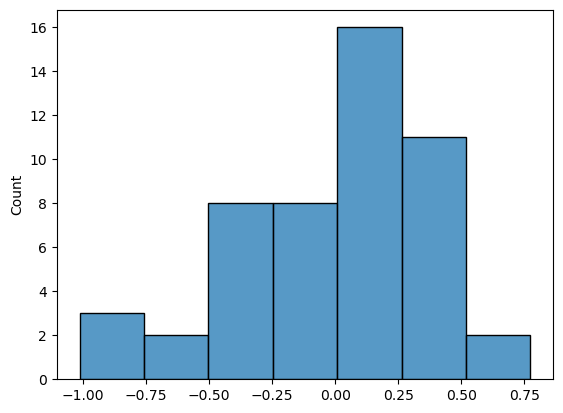

In [30]:
resids = result.resid

sns.histplot(resids)
plt.show()

In [32]:
#the co-efficients
result.params

const          -512.716856
Latitude          7.336960
Longitude        -1.262025
Review Count     -0.000426
dtype: float64

# Stretch

How can you turn the regression model into a classification model?